In [17]:
import transformers
import torch
import torch.nn as nn
import torch.functional as F

In [13]:
from utils.bert_models import MultiNNLayerParasiteLearnedBERT

In [14]:
m = MultiNNLayerParasiteLearnedBERT().cuda()

In [19]:
criterion = nn.CrossEntropyLoss()

In [12]:
import pandas as pd
from data.bert_processors.processors import QNLI, Tokenize_Transform2, RTE, MSR
import numpy as np
from loguru import logger

class Args:
    def __init__(self):
        self.max_seq_length = 400
        self.model = 'QNLI'
        
args = Args()

In [13]:
tokenizer = Tokenize_Transform2(args, 'bert-base-uncased')

In [14]:
qqp = MSR('train', transform = tokenizer)

In [15]:
length = []
for i in range(len(qqp)):
    length.append(qqp[i]['attention_mask'].numpy().sum())
    if not i % 10000:
        print(i)

0


In [16]:
max(length)

103

(array([ 50., 308., 747., 837., 887., 805., 324., 100.,  11.,   7.]),
 array([ 19. ,  27.4,  35.8,  44.2,  52.6,  61. ,  69.4,  77.8,  86.2,
         94.6, 103. ]),
 <BarContainer object of 10 artists>)

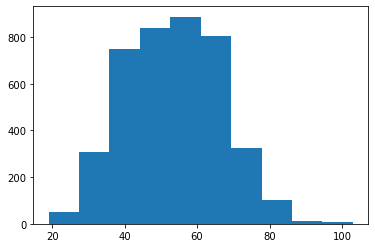

In [17]:
import matplotlib.pyplot as plt
plt.hist(length)

In [18]:
np.percentile(length, 95
             )

74.0

## Parasite only using the first encoder

### Initial parasite model 2/28/2021 on QNLI

In [1]:
losses= {'train_loss': [0.6937696159209643, 0.6920801216821693, 0.6874376548455611, 0.6836012619828604, 0.6807092412235757, 0.6782437231371438, 0.6760404684585094, 0.6740076264668519, 0.6719857640640868, 0.670027916074909, 0.6681799339961414, 0.6663278153759119, 0.664522431524854, 0.6627723758043371, 0.6610411609273441, 0.659329234974284, 0.657683618213511, 0.6561394120678697, 0.6546561504545921, 0.6532746770878556, 0.6518833096211282, 0.6505874462089936, 0.6493912297893174, 0.6482425221266336, 0.6471580141066026], 'dev_acc': [0.5206988226357767, 0.5565894417014812, 0.5845043676414736, 0.5934295480440562, 0.6090011393847322, 0.6055829851879985, 0.6146980630459552, 0.6247626281807824, 0.6355867831371059, 0.6251424230915306, 0.6439422711735663, 0.6600835548803646, 0.6507785795670338, 0.6513482719331561, 0.6619825294341056, 0.6707178123813141, 0.6576148879605014, 0.674515761488796, 0.67052791492594, 0.6750854538549184, 0.6652107861754653, 0.6741359665780479, 0.6775541207747816, 0.680212685150019, 0.6807823775161412]}

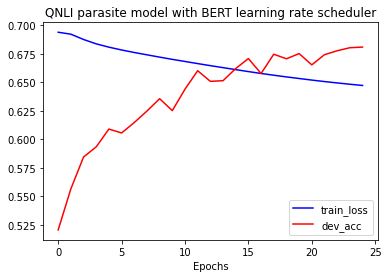

In [8]:
import matplotlib.pyplot as plt
plt.plot(losses['train_loss'], color = 'blue', label = 'train_loss')
plt.plot(losses['dev_acc'], color = 'red', label = 'dev_acc')
plt.xlabel("Epochs")
plt.title("QNLI parasite model with BERT learning rate scheduler")
plt.legend()

### Initial parasite model 2/28/2021 on QNLI with linear scheduler
python -m models.parasite --model QNLI --checkpoint bert-base-uncased --batch-size 16 --lr 1e-3 --num-labels 2 --max-seq-length 100 --warmup-proportion 0.01  --epochs 100

In [19]:
losses = {'train_loss': [0.693662550220016, 0.6912170656112112, 0.6862671730035586, 0.682659803640713, 0.6798559054031772, 0.6775459957956682, 0.6755567382804362, 0.6735831970809919, 0.6717268894560511, 0.6698584456389223, 0.6680191000700586, 0.666281733135706, 0.6646001622039008, 0.6629436753365731, 0.6613450303742335, 0.6596930247898408, 0.6581323784059084, 0.6566559259739532, 0.6553072807822045, 0.6539832167162093, 0.6526639965121424, 0.651429674135074, 0.6502001903445281, 0.649015561706657, 0.6479156007809266, 0.6467653948114505, 0.6456162152348779, 0.6445347066210244, 0.643484395641643, 0.6424714815713714, 0.6414751066609413, 0.6404966645879141, 0.6395779857260078, 0.6386505482338305, 0.6377836401314848, 0.6369361265771925, 0.6361380595626293, 0.6353223738978557, 0.6345554413628481, 0.6337904184626645, 0.6330874235421974, 0.6323725484946018, 0.6316749637383764, 0.6309961447851792, 0.6303564928139236, 0.6297388796738461, 0.6291431270256781, 0.6285376868764421, 0.6279525894866257, 0.6273878899333641, 0.6268544071784832, 0.6263423109246465, 0.6258207715071359, 0.6253147207880227, 0.6248242491943156, 0.6243365747405535, 0.6238620012414889, 0.6233930976784493, 0.6229398998647869, 0.62250232857475, 0.622060606538894, 0.621628013695783, 0.6212241854944317, 0.6208159582849081, 0.6204029496379689, 0.620021176753524, 0.6196373145285702, 0.6192547779335292, 0.6188714319318837, 0.6185049156661468, 0.6181667198708263, 0.6178391597861258, 0.6175077186007871, 0.6171734834123267, 0.6168476906499722, 0.6165244234367085, 0.6162074529374479, 0.6158977211732264, 0.6156050340420072, 0.6153150720232512, 0.6150323399160763, 0.6147457082116861, 0.6144563046049203, 0.6141689443670609, 0.6138941966150154, 0.6136182124470788, 0.6133416654655051, 0.6130627265674908, 0.6127974217195368, 0.6125394970805427, 0.6122773177723914, 0.6120327173733697, 0.6117842044021911, 0.6115447197283173, 0.6113123179448736, 0.6110726904974664, 0.610856734602123, 0.6106311333661985, 0.6104127585041559, 0.6102105941011796], 'dev_acc': [0.5260159513862515, 0.5770983668818838, 0.5896315989365742, 0.5898214963919484, 0.5995062666160274, 0.6055829851879985, 0.6186859096088112, 0.6319787314849981, 0.6342575009494873, 0.6361564755032283, 0.6484998101025446, 0.6477402202810483, 0.6429927838966958, 0.6538169388530194, 0.6623623243448538, 0.6699582225598177, 0.6488796050132928, 0.6851500189897456, 0.6654006836308394, 0.6617926319787315, 0.6720470945689327, 0.6807823775161412, 0.6842005317128751, 0.6798328902392708, 0.6735662742119256, 0.6887580706418533, 0.6849601215343715, 0.6938853019369541, 0.6874287884542347, 0.7018609950626662, 0.6876186859096088, 0.6938853019369541, 0.7045195594379036, 0.6718571971135586, 0.7030003797949107, 0.7024306874287884, 0.7043296619825294, 0.7026205848841626, 0.7092669958222559, 0.7054690467147741, 0.6935055070262058, 0.689574629699962, 0.6853399164451196, 0.697683251044436, 0.6963539688568173, 0.6838207368021268, 0.7064185339916446, 0.7054690467147741, 0.7115457652867452, 0.7096467907330042, 0.6986327383213065, 0.7067983289023927, 0.7134447398404862, 0.7153437143942272, 0.713254842385112, 0.7183820736802127, 0.691796429927839, 0.7113558678313711, 0.691796429927839, 0.7143942271173567, 0.719141663501709, 0.7031902772502848, 0.6862894037219901, 0.7181921762248386, 0.7138245347512343, 0.7073680212685151, 0.7202810482339537, 0.72104063805545, 0.7104063805545006, 0.7166729965818458, 0.7052791492593999, 0.7111659703759969, 0.7096467907330042, 0.6982529434105583, 0.7130649449297379, 0.7183820736802127, 0.6912267375617167, 0.7111659703759969, 0.7136346372958602, 0.7096467907330042, 0.7187618685909609, 0.7102164830991264, 0.7212305355108242, 0.7111659703759969, 0.7145841245727307, 0.6959741739460691, 0.7189517660463349, 0.7035700721610331, 0.7124952525636157, 0.724838587162932, 0.7257880744398025, 0.7200911507785795, 0.6965438663121915, 0.6800227876946449, 0.7081276110900114, 0.7174325864033422, 0.7162932016710976, 0.7200911507785795, 0.7235093049753133, 0.7134447398404862]}

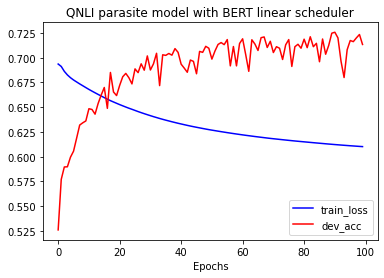

In [29]:
import matplotlib.pyplot as plt
plt.plot(losses['train_loss'], color = 'blue', label = 'train_loss')
plt.plot(losses['dev_acc'], color = 'red', label = 'dev_acc')
plt.xlabel("Epochs")
plt.title("QNLI parasite model with BERT linear scheduler")
plt.legend(loc = 'lower right')

## Parasite using all encoders, and no parasite for embedding layer

In [31]:
losses = {'train_loss': [0.6893765096705121, 0.6836724050753425, 0.6799911031126206, 0.6774251660454912, 0.6755924382220876, 0.6742097186262305, 0.6730112248918744, 0.6718765588418008, 0.6707693321500787, 0.6696623851514953, 0.6683827733235178, 0.666983270539558, 0.6654543598255807, 0.6636921745528143, 0.6618705499122887, 0.66005834016264, 0.6582660683856378, 0.6565858783950355, 0.6549594761440283, 0.6533399799017595, 0.6517830365660396, 0.6502920442360969, 0.6488916347271058, 0.6474892460827082, 0.6461840794657995, 0.6448631510038026, 0.6436582412404055, 0.6424430622448285, 0.6412915411009451, 0.6401763403233799, 0.639086163145706, 0.6380271072547863, 0.6369817586363764, 0.6360118594364863, 0.6350646278527363, 0.6341703736118516, 0.6332914296002976, 0.6324368723700899, 0.6316129785850005, 0.6308021253101164, 0.6300307290735943, 0.6292709684503185, 0.6285365424629654, 0.6278375505734771, 0.6271459553245018, 0.6264895137548084, 0.6258436969561577, 0.6251867609789761, 0.6245683314393116, 0.6239574051017073, 0.6233760201672051, 0.622799885218202, 0.6222388944695547, 0.6216826278312252, 0.6211460661978923, 0.6206035391909082, 0.6200852532457066, 0.6195898594950753, 0.6190987908489531, 0.6186139977841467, 0.6181404780665525, 0.617671508966076, 0.6172203249067554, 0.6167811845262341, 0.6163433288710495, 0.6159188666260763, 0.6155078364665292, 0.6150850533497266, 0.614679916084186, 0.6142960337308747, 0.6139090390527846, 0.6135287017937765, 0.6131530228179362, 0.6127855885758822, 0.6124148459693459, 0.6120469613368473, 0.6116939678534611, 0.6113376215921659, 0.6109958238544486, 0.6106760156519937, 0.6103595576107494, 0.6100361317129996, 0.609717291318167, 0.6094052089772181, 0.6090949734433556, 0.608788722947038, 0.608488638487263, 0.6081968997998785, 0.6079065674390681, 0.6076197729223957, 0.6073369385850111, 0.6070620575947706, 0.6068000649418812, 0.6065268021704308, 0.6062718837527743, 0.6060074088478932, 0.6057479867475021, 0.6054979519389119, 0.60524804723457, 0.6049938489305039], 'dev_acc': [0.5628560577288264, 0.5824154956323585, 0.5837447778199772, 0.5884922142043296, 0.6040638055450057, 0.6004557538928978, 0.6012153437143942, 0.5972274971515382, 0.6194454994303077, 0.6183061146980631, 0.6325484238511204, 0.6315989365742499, 0.6340676034941132, 0.6350170907709837, 0.6315989365742499, 0.6712875047474364, 0.6268515001898974, 0.6678693505507026, 0.6479301177364223, 0.6733763767565515, 0.6682491454614509, 0.6870489935434865, 0.6824914546145082, 0.6929358146600836, 0.655146221040638, 0.680212685150019, 0.6849601215343715, 0.6935055070262058, 0.6963539688568173, 0.7018609950626662, 0.6623623243448538, 0.6872388909988606, 0.6957842764906951, 0.6916065324724648, 0.703380174705659, 0.7007216103304216, 0.6946448917584505, 0.701481200151918, 0.7067983289023927, 0.6982529434105583, 0.695594379035321, 0.6815419673376377, 0.6602734523357388, 0.7050892518040258, 0.7086973034561337, 0.666729965818458, 0.7077478161792632, 0.6935055070262058, 0.6967337637675655, 0.7035700721610331, 0.7107861754652488, 0.7047094568932776, 0.6908469426509685, 0.7079377136346373, 0.695594379035321, 0.7111659703759969, 0.6963539688568173, 0.6889479680972275, 0.6828712495252564, 0.703380174705659, 0.7130649449297379, 0.6866691986327383, 0.686099506266616, 0.6881883782757311, 0.7126851500189898, 0.6853399164451196, 0.7026205848841626, 0.6997721230535511, 0.7111659703759969, 0.6978731484998101, 0.7164830991264717, 0.691796429927839, 0.7143942271173567, 0.7153437143942272, 0.7149639194834789, 0.7079377136346373, 0.6986327383213065, 0.7140144322066084, 0.7193315609570832, 0.7092669958222559, 0.7109760729206228, 0.7153437143942272, 0.7107861754652488, 0.6986327383213065, 0.7134447398404862, 0.6807823775161412, 0.7045195594379036, 0.6488796050132928, 0.6940751993923281, 0.7178123813140904, 0.6906570451955943, 0.6982529434105583, 0.6824914546145082, 0.6462210406380554, 0.6832510444360046, 0.7100265856437524, 0.7050892518040258, 0.7045195594379036, 0.7123053551082416, 0.6887580706418533]}

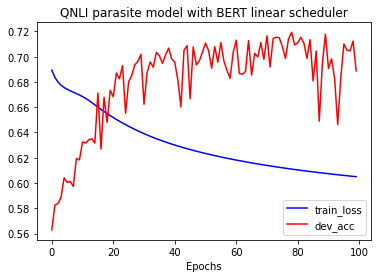

In [32]:
import matplotlib.pyplot as plt
plt.plot(losses['train_loss'], color = 'blue', label = 'train_loss')
plt.plot(losses['dev_acc'], color = 'red', label = 'dev_acc')
plt.xlabel("Epochs")
plt.title("QNLI parasite model with BERT linear scheduler")
plt.legend(loc = 'lower right')

## Parasite using all encoders, and with parasite for embedding layer

### Look back only 3 layers at the most

HBox(children=(FloatProgress(value=0.0, description='Epoch', style=ProgressStyle(description_width='initial')), HTML(value='')))
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:22<00:00, 16.83it/s]
2021-03-02 18:23:54.186 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6938410172081437
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 18:23:54.373 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 18:23:54.389 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.63it/s]
2021-03-02 18:24:07.279 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  1, Dev/Acc  0.516, Dev/Pr.  0.516, Dev/Re.  0.516, Dev/F1  0.516, Dev/Loss  0.693
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.80it/s]
2021-03-02 18:30:32.613 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6931938714857153
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 18:30:32.801 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 18:30:32.801 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.57it/s]
2021-03-02 18:30:45.722 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  2, Dev/Acc  0.532, Dev/Pr.  0.532, Dev/Re.  0.532, Dev/F1  0.532, Dev/Loss  0.690
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.80it/s]
2021-03-02 18:37:11.178 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6923053639077511
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 18:37:11.288 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 18:37:11.288 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.60it/s]
2021-03-02 18:37:24.209 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  3, Dev/Acc  0.550, Dev/Pr.  0.550, Dev/Re.  0.550, Dev/F1  0.550, Dev/Loss  0.688
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.80it/s]
2021-03-02 18:43:49.710 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6915590376656031
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 18:43:49.898 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 18:43:49.898 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.60it/s]
2021-03-02 18:44:02.804 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  4, Dev/Acc  0.542, Dev/Pr.  0.542, Dev/Re.  0.542, Dev/F1  0.542, Dev/Loss  0.690
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.78it/s]
2021-03-02 18:50:26.795 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.690743698187814
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 18:50:27.014 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 18:50:27.014 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.60it/s]
2021-03-02 18:50:39.904 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  5, Dev/Acc  0.547, Dev/Pr.  0.547, Dev/Re.  0.547, Dev/F1  0.547, Dev/Loss  0.686
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.81it/s]
2021-03-02 18:57:05.100 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6899528507286798
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 18:57:05.209 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 18:57:05.209 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.73it/s]
2021-03-02 18:57:18.053 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  6, Dev/Acc  0.563, Dev/Pr.  0.563, Dev/Re.  0.563, Dev/F1  0.563, Dev/Loss  0.682
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.82it/s]
2021-03-02 19:03:42.884 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6890585616067469
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 19:03:43.024 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 19:03:43.024 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.76it/s]
2021-03-02 19:03:55.852 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  7, Dev/Acc  0.553, Dev/Pr.  0.553, Dev/Re.  0.553, Dev/F1  0.553, Dev/Loss  0.683
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:24<00:00, 16.77it/s]
2021-03-02 19:10:20.226 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.688236728588031
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 19:10:20.414 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 19:10:20.414 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.60it/s]
2021-03-02 19:10:33.319 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  8, Dev/Acc  0.567, Dev/Pr.  0.567, Dev/Re.  0.567, Dev/F1  0.567, Dev/Loss  0.676
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.82it/s]
2021-03-02 19:16:58.325 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6874883212839547
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 19:16:58.419 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 19:16:58.419 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.63it/s]
2021-03-02 19:17:11.309 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  9, Dev/Acc  0.561, Dev/Pr.  0.561, Dev/Re.  0.561, Dev/F1  0.561, Dev/Loss  0.683
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.81it/s]
2021-03-02 19:23:34.771 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6867274060283547
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 19:23:34.958 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 19:23:34.958 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.60it/s]
2021-03-02 19:23:47.848 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  10, Dev/Acc  0.565, Dev/Pr.  0.565, Dev/Re.  0.565, Dev/F1  0.565, Dev/Loss  0.679
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:22<00:00, 16.84it/s]
2021-03-02 19:30:10.510 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6860448003130526
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 19:30:10.713 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 19:30:10.713 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.64it/s]
2021-03-02 19:30:23.598 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  11, Dev/Acc  0.568, Dev/Pr.  0.568, Dev/Re.  0.568, Dev/F1  0.568, Dev/Loss  0.679
2021-03-02 19:30:23.598 | INFO     | common.trainers.bert_glue_trainer:train:181 - Early Stopping. Epoch: 10, Best Dev Loss: 0.676151331988248
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:22<00:00, 16.83it/s]
2021-03-02 19:36:46.439 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6853075182484908
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 19:36:46.626 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 19:36:46.626 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.63it/s]
2021-03-02 19:36:59.517 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  12, Dev/Acc  0.582, Dev/Pr.  0.582, Dev/Re.  0.582, Dev/F1  0.582, Dev/Loss  0.675
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:22<00:00, 16.83it/s]
2021-03-02 19:43:24.187 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6846446323349957
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 19:43:24.390 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 19:43:24.390 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.65it/s]
2021-03-02 19:43:37.258 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  13, Dev/Acc  0.575, Dev/Pr.  0.575, Dev/Re.  0.575, Dev/F1  0.575, Dev/Loss  0.679
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:22<00:00, 16.83it/s]
2021-03-02 19:50:00.148 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6839544904997644
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 19:50:00.273 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 19:50:00.273 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.55it/s]
2021-03-02 19:50:13.204 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  14, Dev/Acc  0.577, Dev/Pr.  0.577, Dev/Re.  0.577, Dev/F1  0.577, Dev/Loss  0.677
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:22<00:00, 16.85it/s]
2021-03-02 19:56:35.714 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6833087994157112
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 19:56:35.855 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 19:56:35.870 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.74it/s]
2021-03-02 19:56:48.708 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  15, Dev/Acc  0.590, Dev/Pr.  0.590, Dev/Re.  0.590, Dev/F1  0.590, Dev/Loss  0.671
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.80it/s]
2021-03-02 20:03:14.096 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.68265514118818
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 20:03:14.205 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 20:03:14.205 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.69it/s]
2021-03-02 20:03:27.080 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  16, Dev/Acc  0.593, Dev/Pr.  0.593, Dev/Re.  0.593, Dev/F1  0.593, Dev/Loss  0.671
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:24<00:00, 16.74it/s]
2021-03-02 20:09:51.986 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6820376420725008
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 20:09:52.111 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 20:09:52.111 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.71it/s]
2021-03-02 20:10:04.961 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  17, Dev/Acc  0.585, Dev/Pr.  0.585, Dev/Re.  0.585, Dev/F1  0.585, Dev/Loss  0.675
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:29<00:00, 16.55it/s]
2021-03-02 20:16:34.338 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6813879777633284
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 20:16:34.542 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 20:16:34.542 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.61it/s]
2021-03-02 20:16:47.442 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  18, Dev/Acc  0.584, Dev/Pr.  0.584, Dev/Re.  0.584, Dev/F1  0.584, Dev/Loss  0.674
2021-03-02 20:16:47.442 | INFO     | common.trainers.bert_glue_trainer:train:181 - Early Stopping. Epoch: 17, Best Dev Loss: 0.6707140227158864
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.82it/s]
2021-03-02 20:23:10.547 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6806861173215364
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 20:23:10.734 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 20:23:10.734 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.68it/s]
2021-03-02 20:23:23.600 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  19, Dev/Acc  0.601, Dev/Pr.  0.601, Dev/Re.  0.601, Dev/F1  0.601, Dev/Loss  0.666
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.82it/s]
2021-03-02 20:29:48.492 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6799345358494089
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 20:29:48.679 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 20:29:48.679 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.66it/s]
2021-03-02 20:30:01.554 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  20, Dev/Acc  0.607, Dev/Pr.  0.607, Dev/Re.  0.607, Dev/F1  0.607, Dev/Loss  0.666
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.81it/s]
2021-03-02 20:36:26.681 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6791290113776113
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 20:36:26.869 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 20:36:26.869 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.62it/s]
2021-03-02 20:36:39.766 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  21, Dev/Acc  0.619, Dev/Pr.  0.619, Dev/Re.  0.619, Dev/F1  0.619, Dev/Loss  0.655
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.82it/s]
2021-03-02 20:43:04.544 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6782921427698093
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 20:43:04.732 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 20:43:04.732 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.68it/s]
2021-03-02 20:43:17.598 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  22, Dev/Acc  0.623, Dev/Pr.  0.623, Dev/Re.  0.623, Dev/F1  0.623, Dev/Loss  0.653
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.78it/s]
2021-03-02 20:49:43.261 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6773941723621727
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 20:49:43.386 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 20:49:43.386 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.74it/s]
2021-03-02 20:49:56.224 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  23, Dev/Acc  0.614, Dev/Pr.  0.614, Dev/Re.  0.614, Dev/F1  0.614, Dev/Loss  0.651
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.80it/s]
2021-03-02 20:56:21.479 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6764156429564765
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 20:56:21.572 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 20:56:21.588 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.66it/s]
2021-03-02 20:56:34.463 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  24, Dev/Acc  0.630, Dev/Pr.  0.630, Dev/Re.  0.630, Dev/F1  0.630, Dev/Loss  0.647
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:26<00:00, 16.68it/s]
2021-03-02 21:03:02.521 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6753790650068096
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 21:03:02.724 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 21:03:02.724 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.66it/s]
2021-03-02 21:03:15.583 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  25, Dev/Acc  0.621, Dev/Pr.  0.621, Dev/Re.  0.621, Dev/F1  0.621, Dev/Loss  0.645
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:24<00:00, 16.75it/s]
2021-03-02 21:09:42.043 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.674276446919812
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 21:09:42.215 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 21:09:42.215 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.62it/s]
2021-03-02 21:09:55.113 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  26, Dev/Acc  0.607, Dev/Pr.  0.607, Dev/Re.  0.607, Dev/F1  0.607, Dev/Loss  0.658
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.80it/s]
2021-03-02 21:16:18.861 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6731626856989159
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 21:16:19.001 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 21:16:19.001 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.69it/s]
2021-03-02 21:16:31.860 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  27, Dev/Acc  0.641, Dev/Pr.  0.641, Dev/Re.  0.641, Dev/F1  0.641, Dev/Loss  0.636
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:23<00:00, 16.80it/s]
2021-03-02 21:22:57.239 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6720250304490675
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 21:22:57.442 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 21:22:57.442 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.66it/s]
2021-03-02 21:23:10.317 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  28, Dev/Acc  0.607, Dev/Pr.  0.607, Dev/Re.  0.607, Dev/F1  0.607, Dev/Loss  0.661
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:24<00:00, 16.76it/s]
2021-03-02 21:29:34.964 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6708666669919324
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 21:29:35.151 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 21:29:35.151 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.57it/s]
2021-03-02 21:29:48.075 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  29, Dev/Acc  0.614, Dev/Pr.  0.614, Dev/Re.  0.614, Dev/F1  0.614, Dev/Loss  0.654
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:27<00:00, 16.63it/s]
2021-03-02 21:36:15.585 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.6697178180596303
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 21:36:15.710 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 21:36:15.710 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.63it/s]
2021-03-02 21:36:28.600 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  30, Dev/Acc  0.626, Dev/Pr.  0.626, Dev/Re.  0.626, Dev/F1  0.626, Dev/Loss  0.649
2021-03-02 21:36:28.600 | INFO     | common.trainers.bert_glue_trainer:train:181 - Early Stopping. Epoch: 29, Best Dev Loss: 0.6361015328855225
Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6445/6445 [06:28<00:00, 16.60it/s]
2021-03-02 21:42:56.843 | INFO     | common.trainers.bert_glue_trainer:train_epoch:129 - Training complete! Loss: 0.668557595165646
b'Skipping line 660: expected 4 fields, saw 5\n'
2021-03-02 21:42:57.000 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:68 - Initializing QNLI-dev with 100 token length
2021-03-02 21:42:57.000 | INFO     | common.evaluators.bert_glue_evaluator:get_loss:85 - Generating metrics
Evaluating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [00:12<00:00, 25.54it/s]
2021-03-02 21:43:09.935 | INFO     | common.trainers.bert_glue_trainer:train:168 - Epoch  31, Dev/Acc  0.642, Dev/Pr.  0.642, Dev/Re.  0.642, Dev/F1  0.642, Dev/Loss  0.637
2021-03-02 21:43:09.935 | INFO     | common.trainers.bert_glue_trainer:train:181 - Early Stopping. Epoch: 30, Best Dev Loss: 0.6361015328855225
Training:  23%|███████████████████████████████▌          

### Allow BERT weights to tune as well

In [11]:
[n for n, p in model.named_parameters() if n.startswith('p')]

['p1.params',
 'p1.bias',
 'p2.params',
 'p2.bias',
 'p3.params',
 'p3.bias',
 'p4.params',
 'p4.bias',
 'p5.params',
 'p5.bias',
 'p6.params',
 'p6.bias',
 'p7.params',
 'p7.bias',
 'p8.params',
 'p8.bias',
 'p9.params',
 'p9.bias',
 'p10.params',
 'p10.bias',
 'p11.params',
 'p11.bias',
 'p12.params',
 'p12.bias']

In [144]:
import glob
import json
import matplotlib.pyplot as plt

f = glob.glob('parasite/tanh/MSR*')

In [145]:
for j in f:
    js = json.load(open(j))
    print(j, max(js['dev_acc']))

parasite/tanh\MSR_freeze_1parasite.json 0.6666666666666666
parasite/tanh\MSR_freeze_3parasite.json 0.6852173913043478
parasite/tanh\MSR_freeze_allparasite.json 0.6944927536231884
parasite/tanh\MSR_freeze_noparasite.json 0.6689855072463768
parasite/tanh\MSR_nofreeze_1parasite.json 0.8376811594202899
parasite/tanh\MSR_nofreeze_3parasite.json 0.6979710144927537
parasite/tanh\MSR_nofreeze_allparasite.json 0.6904347826086956
parasite/tanh\MSR_nofreeze_noparasite.json 0.8365217391304348


In [150]:
labels = []
dev_acc = []
f = glob.glob('MSR*')
for j in f:
    js = json.load(open(j))
    labels.append(j)
    dev_acc.append(js['dev_acc'])

In [151]:
for k,(i,j) in enumerate(list(zip(labels, dev_acc))):
    print(k,i,max(j))

0 MSR_1_epoch_freeze_1parasite.json 0.7571014492753623
1 MSR_1_epoch_freeze_3parasite.json 0.7582608695652174
2 MSR_1_epoch_freeze_allparasite.json 0.7704347826086957
3 MSR_1_epoch_freeze_noparasite.json 0.7489855072463768
4 MSR_bert_glue.json 0.8185507246376812
5 MSR_freeze_1parasite.json 0.7379710144927536
6 MSR_freeze_3parasite.json 0.7217391304347827
7 MSR_freeze_allparasite.json 0.7344927536231884
8 MSR_freeze_noparasite.json 0.6689855072463768
9 MSR_nofreeze_1parasite.json 0.8446376811594203
10 MSR_nofreeze_3parasite.json 0.8336231884057971
11 MSR_nofreeze_allparasite.json 0.8318840579710145
12 MSR_nofreeze_noparasite.json 0.8336231884057971


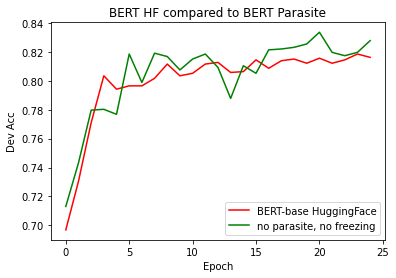

In [88]:
plt.plot(dev_acc[0], color = 'r', label = 'BERT-base HuggingFace')
plt.plot(dev_acc[8], color = 'g', label = 'no parasite, no freezing')
#plt.plot(dev_acc[5], 'bo')
#plt.plot(dev_acc[6], 'b+')
#plt.plot(dev_acc[7], 'b*')
plt.legend(loc = 'lower right')
plt.title("BERT HF compared to BERT Parasite")
plt.ylabel("Dev Acc")
plt.xlabel("Epoch")
plt.savefig('1.png', dpi = 300)

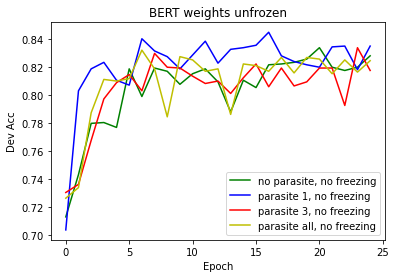

In [89]:
plt.plot(dev_acc[8], color = 'g', label = 'no parasite, no freezing')
plt.plot(dev_acc[5], color = 'b', label = 'parasite 1, no freezing')
plt.plot(dev_acc[6], color = 'r', label = 'parasite 3, no freezing')
plt.plot(dev_acc[7], color = 'y', label = 'parasite all, no freezing')
plt.legend(loc = 'lower right')
plt.title("BERT weights unfrozen")
plt.ylabel("Dev Acc")
plt.xlabel("Epoch")
plt.savefig('2.png', dpi = 300)

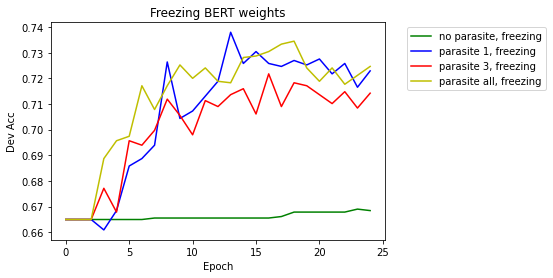

In [101]:
p1, = plt.plot(dev_acc[4], color = 'g', label = 'no parasite, freezing')
p2, = plt.plot(dev_acc[1], color = 'b', label = 'parasite 1, freezing')
p3, = plt.plot(dev_acc[2], color = 'r', label = 'parasite 3, freezing')
p4, = plt.plot(dev_acc[3], color = 'y', label = 'parasite all, freezing')
plt.legend(handles=[p1, p2, p3, p4], bbox_to_anchor=(1.05, 1), loc='upper left')
lgd = plt.title("Freezing BERT weights")
plt.ylabel("Dev Acc")
plt.xlabel("Epoch")
#plt.tight_layout()
plt.savefig('3.png', bbox_extra_artists=(lgd,), dpi = 300)

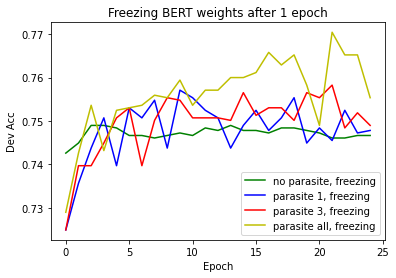

In [160]:
p1, = plt.plot(dev_acc[3], color = 'g', label = 'no parasite, freezing')
p2, = plt.plot(dev_acc[0], color = 'b', label = 'parasite 1, freezing')
p3, = plt.plot(dev_acc[1], color = 'r', label = 'parasite 3, freezing')
p4, = plt.plot(dev_acc[2], color = 'y', label = 'parasite all, freezing')
plt.legend(loc='lower right')
lgd = plt.title("Freezing BERT weights after 1 epoch")
plt.ylabel("Dev Acc")
plt.xlabel("Epoch")
#plt.tight_layout()
plt.savefig('3.png', bbox_extra_artists=(lgd,), dpi = 300)